#Lab.4: Part of Speech

**Authors:**

* Ramón Mateo Navarro
* Benet Manzanares Salor

> Bloque con sangría



##Installation ans imports

In [ ]:
!pip install python-crfsuite
import os
import nltk
import time

from scipy.stats import pearsonr
from nltk.metrics import jaccard_distance
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

nltk.download('averaged_perceptron_tagger')
nltk.download('treebank')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

## Models functions

1. HMM 

In [ ]:
def hmm_training(train_data, test_data):
  trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
  HMM = trainer.train_supervised(train_data)
  ac = round(HMM.evaluate(test_data), 3)
  del HMM
  return ac

2. TnT

In [ ]:
def tnt_training(train_data, test_data):
  TnT = nltk.tag.tnt.TnT()
  TnT.train(train_data)
  ac = round(TnT.evaluate(test_data), 3)
  del TnT
  return ac

3. Perceptron

In [ ]:
def perceptron_training(train_data, test_data):
  PER = nltk.tag.perceptron.PerceptronTagger(load=False)
  PER.train(train_data)
  ac = round(PER.evaluate(test_data), 3)
  del PER
  return ac

4. CRF

In [ ]:
def crf_training(train_data, test_data):
  CRF = nltk.tag.CRFTagger()
  CRF.train(train_data,'crf_tagger_model')
  ac = round(CRF.evaluate(test_data), 3)
  del CRF
  return ac

## Set of training data and test

In [ ]:
t_values = [500,1000,1500,2000,2500,3000]
ac_HMM = []; ac_tnt = []; ac_perceptron = []; ac_crf = []
t_HMM = []; t_tnt = []; t_perceptron = []; t_crf = []
test_data = nltk.corpus.treebank.tagged_sents()[3001:]


In [ ]:
for i in t_values:
  train_data = nltk.corpus.treebank.tagged_sents()[:i]
  tstart = time.time()
  ac_HMM.append(hmm_training(train_data, test_data))
  tend = time.time()
  t_HMM.append(round(tend-tstart, 3))


In [ ]:
for i in t_values:
  train_data = nltk.corpus.treebank.tagged_sents()[:i]
  tstart = time.time()
  ac_tnt.append(tnt_training(train_data, test_data))
  tend = time.time()
  t_tnt.append(round(tend - tstart, 3))

In [ ]:
for i in t_values:
  train_data = nltk.corpus.treebank.tagged_sents()[:i]
  tstart = time.time()
  ac_perceptron.append(perceptron_training(train_data, test_data))
  tend = time.time()
  t_perceptron.append(round(tend - tstart, 3))

In [ ]:
for i in t_values:
  train_data = nltk.corpus.treebank.tagged_sents()[:i]
  tstart = time.time()
  ac_crf.append(crf_training(train_data,test_data))
  tend = time.time()
  t_crf.append(round(tend - tstart, 3))

## Results

[0.173, 0.221, 0.262, 0.304, 0.335, 0.369] 3
[0.747, 0.796, 0.828, 0.849, 0.862, 0.876]
[0.912, 0.931, 0.941, 0.949, 0.953, 0.958]
[0.91, 0.925, 0.933, 0.939, 0.943, 0.948]
[7.78, 8.59, 9.179, 9.897, 10.253, 10.613] 
 [16.339, 42.293, 69.709, 88.333, 94.246, 100.328] 
 [5.402, 9.012, 12.486, 16.122, 19.148, 22.366] 
 [5.102, 12.065, 20.689, 31.799, 44.671, 53.995]


Text(0, 0.5, 'Time in seconds')

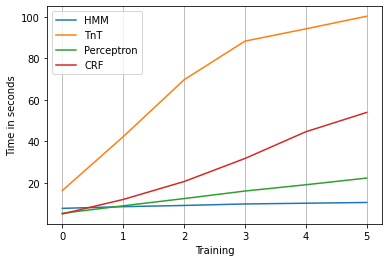

In [ ]:
print(ac_HMM, 3)
print(ac_tnt)
print(ac_perceptron)
print(ac_crf)
print(t_HMM, '\n' , t_tnt, '\n', t_perceptron, '\n', t_crf)
plt.plot(t_HMM)
plt.plot(t_tnt)
plt.plot(t_perceptron)
plt.plot(t_crf)
plt.legend(["HMM", "TnT", "Perceptron", "CRF"])
plt.grid(b=True, axis="x")
plt.xlabel("Training")
plt.ylabel("Time in seconds")